# **Loan approval prediction**

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
  
data = pd.read_csv("LoanApprovalPrediction.csv") 

In [8]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing and visualization

In [9]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [10]:
#Dropiing loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\DELL\anacon

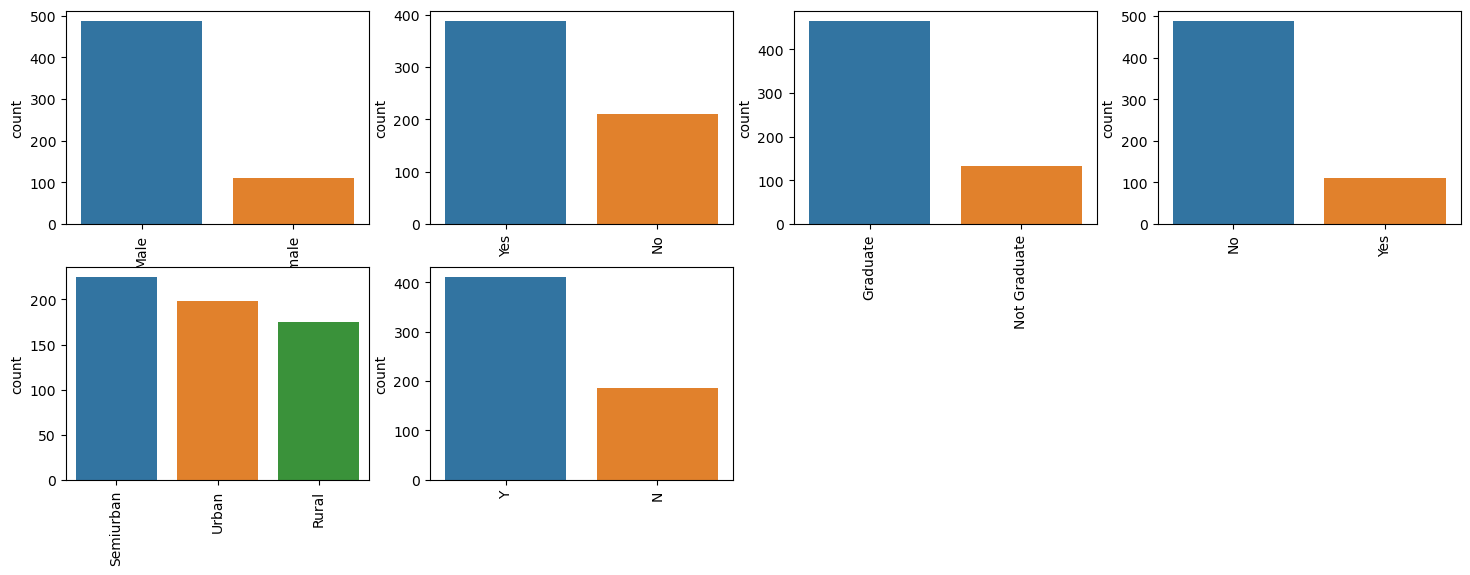

In [11]:
#bar plot
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

# Label Encoding

In [12]:
from sklearn import preprocessing 
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [13]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


AttributeError: 'numpy.int32' object has no attribute 'startswith'

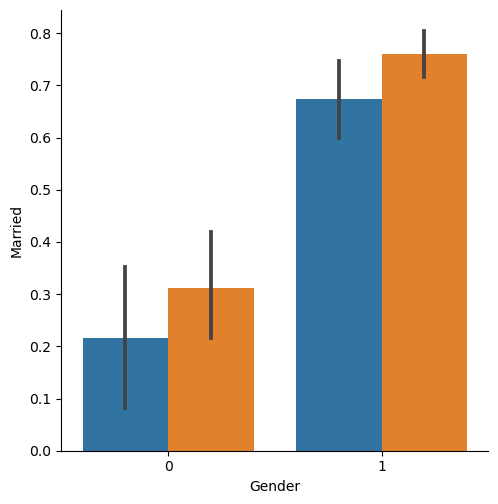

In [14]:
#Catplot
sns.catplot(x="Gender", y="Married", 
            hue="Loan_Status",  
            kind="bar",  
            data=data)

In [ ]:
#Missing values
for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean())  
    
data.isna().sum()

In [15]:
# Splitting Dataset

from sklearn.model_selection import train_test_split 
  
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

Model Training and Evaluation
KNeighborsClassifiers
RandomForestCalssifiers
Support Vector Classifiers (SVC)
Logistics Regression

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train,  
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.88826815642457


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# making predictions on the testing set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(Y_test, 
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.0


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Conclusion : 
Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.